<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/P10_Unsupervise_Learning%20-%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.	Percobaan 1 : Implementasi Clustering dengan K-Means**

In [7]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
url = "https://raw.githubusercontent.com/ImNotDanish05/2025_KC_TI-1A/main/Data/P10/Customer.csv"

# Baca file CSV langsung dari GitHub
dataset = pd.read_csv(url)
# Tampilkan beberapa baris pertama
dataset.head()

,IDPelanggan,Kelamin,Usia,Rating_belanja (1-100),Pendapatan (juta Rp)
0,1,Perempuan,23,87,29
1,2,Laki,60,4,30
2,3,Perempuan,21,73,30
3,4,Laki,53,4,33
4,5,Laki,18,92,33


In [9]:
X = dataset.iloc[:, [3, 4]]
X

,Rating_belanja (1-100),Pendapatan (juta Rp)
0,87,29
1,4,30
2,73,30
3,4,33
4,92,33
...,...,...
195,75,87
196,10,87
197,92,87
198,13,88


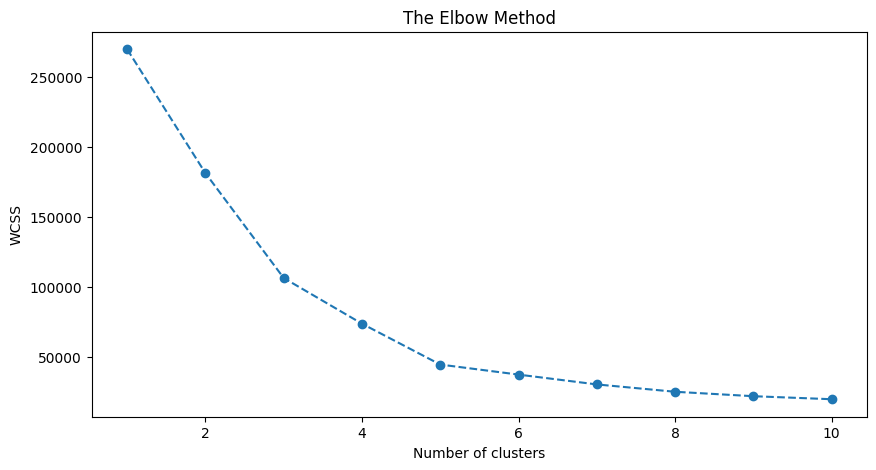

In [11]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Pada saat kluster berpindah dari 4 ke 5 terjadi penurunan / perubahan yang cukup signifikan.
# Sehingga dapat ditarik kesimpulan bahwa jumlah kluster yang optimal adalah 5.
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2, 0, 0, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)